# Linear Regression Analysis Workflow

This notebook provides a structured approach to perform and analyze linear regression on a dataset. Each function and its purpose are outlined below:

## Overview:

1. **Imports**: Essential libraries like `numpy`, `pandas`, `matplotlib`, and `statsmodels` are imported for data manipulation, visualization, and statistical modeling.

2. **Configuration & Settings**: Plots are set to display in high resolution, and future warnings are silenced.

3. **Pairs Plot (`pairs_plot`)**: Visualize pair-wise relationships and distributions in your dataset. It's a great way to quickly see how variables correlate.

4. **Target Extraction (`extract_y`)**: Before diving into regression, this function separates the target variable (or dependent variable) from the predictor variables.

5. **Significance Plot (`plot_significance`)**: After model fitting, this function helps visualize which predictors significantly influence the target variable.

6. **Diagnostic Plots (`diagnostic_plots`)**: A collection of plots that assist in verifying linear regression assumptions:
   - Residuals vs. Fitted
   - Histogram of Residuals
   - Q-Q Plot
   - Scale-Location Plot

7. **Dummy Data Creation**: A sample data creation step is provided to demonstrate the workflow. Replace this with your real-world data when ready.

8. **Linear Regression Workflow (`linear_regression_workflow`)**: The heart of this notebook. This function integrates the entire analysis process. It extracts the target column, runs linear regression, displays the regression summary, visualizes coefficient significance, and shows diagnostic plots.



## Usage:

Replace the dummy data section with your dataset. Call the `linear_regression_workflow` function, passing your dataframe and specifying the target column. You'll be presented with plots and summaries tailored to your dataset.

Make sure you have all the required libraries. If not, install them using pip:

```python
pip install numpy pandas matplotlib statsmodels
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%config InlineBackend.figure_format='retina'
import statsmodels.api as sm
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
def pairs_plot(data):
    n = data.shape[1]
    fig, ax = plt.subplots(n, n, figsize=(12, 12))
    line_colour='#a2becd'
    for i in range(n):
        for j in range(n):
            # Set the background color to a very light grey
            ax[i, j].set_facecolor('#F8F8FF')
            # Set the spine color
            for spine in ax[i, j].spines.values():
                spine.set_edgecolor(line_colour)
            # Plotting
            if i == j:
                ax[i, j].hist(data.iloc[:, i], color='#40bcb7', bins=30, edgecolor=None)
            else:
                ax[i, j].scatter(data.iloc[:, j], data.iloc[:, i], color='#40bcb7', edgecolor=None, s=10)
            # X-axis settings
            if i == n - 1:
                ax[i, j].set_xlabel(data.columns[j])
            else:
                ax[i, j].set_xticks([])
            # Y-axis settings
            if j == 0:
                ax[i, j].set_ylabel(data.columns[i])
            else:
                ax[i, j].set_yticks([])
    plt.tight_layout()
    plt.show()

In [3]:
def extract_y(dataframe, column_name):
    """
    Extracts a specified column as a numpy array and returns the modified dataframe without the column.

    Parameters:
    - dataframe: The input DataFrame.
    - column_name: Name of the column to be extracted.

    Returns:
    - modified_df: DataFrame without the specified column.
    - y: numpy.ndarray of the extracted column.
    """
    
    y = dataframe[column_name].values
    modified_df = dataframe.drop(columns=[column_name])
    
    return modified_df, y

In [4]:
def plot_significance(model):
    
    # Define alpha for significance
    alpha=0.05
    
    # Extract values from model
    params = model.params
    std_errors = model.bse
    p_values = model.pvalues
    r_squared = model.rsquared
    
    # Define colors based on significance
    not_sig, sig = '#a2becd', '#40bcb7'
    colors = [sig if p < alpha else not_sig for p in p_values]
    
    # Plot
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Set the background color to a very light grey
    ax.set_facecolor('#F8F8FF')
    
    # Add a grid
    ax.grid(True, which='both', color='#b3cee5', linestyle='-', linewidth=0.5)
    
    # Plot the bars with error bars (with alpha=0.5 for transparency) and set a higher zorder
    ax.bar(params.index, params, yerr=std_errors, color=colors, capsize=5, zorder=3, error_kw=dict(alpha=0.3))
    
    sig_patch = mpatches.Patch(color=sig, label='Significant')
    not_sig_patch = mpatches.Patch(color=not_sig, label='Not significant')
    ax.legend(handles=[sig_patch, not_sig_patch])
    
    # Mark significance threshold
    ax.axhline(0, color='black', linewidth=0.5)
    ax.set_ylabel('Coefficient')
    ax.set_xlabel('Features')
    ax.set_title(f'Feature Coefficients and Their Significance\n$R^2$: {r_squared*100:.2f}%', fontweight='bold')
    
    # X-axis tick labels
    ax.tick_params(axis='x', rotation=-45)
    
    # Remove tick marks
    ax.tick_params(left=False, bottom=False)  # Remove ticklines

    # Change the spine color
    line_colour='#a2becd'
    for spine in ax.spines.values():
        spine.set_edgecolor(line_colour)
    
    # Show the plot
    plt.show()


In [5]:
def diagnostic_plots(model):
    # Extract residuals and fitted values
    residuals = model.resid
    fitted = model.fittedvalues
    standardized_residuals = model.get_influence().resid_studentized_internal
    
    feature_colour='#40bcb7'
    line_colour='#a2becd'

    # Set up the figure and axes
    fig, ax = plt.subplots(2, 2, figsize=(14, 10))
    
    # Set the background color, grid, and spines color for all subplots
    for axis in ax.ravel():
        axis.set_facecolor('#F8F8FF')
        axis.grid(True, which='both', color='#b3cee5', linestyle='-', linewidth=0.5)
        axis.tick_params(left=False, bottom=False)  # Remove ticklines
        
        # Set border color
        for spine in axis.spines.values():
            spine.set_edgecolor(line_colour)

    # Residuals vs Fitted plot
    ax[0, 0].scatter(fitted, residuals, color=feature_colour)
    ax[0, 0].axhline(y = 0, color =line_colour, linestyle = '--')
    ax[0, 0].set_title('Residuals vs Fitted', fontweight='bold')
    ax[0, 0].set_xlabel('Fitted values')
    ax[0, 0].set_ylabel('Residuals')

    # Histogram
    ax[0, 1].hist(residuals, bins=30, edgecolor='none', color=feature_colour)
    ax[0, 1].set_title('Histogram of Residuals', fontweight='bold')
    ax[0, 1].set_xlabel('Residuals')

    # QQ Plot
    sm.qqplot(residuals, fit=True, line='45', ax=ax[1, 0])
    ax[1, 0].set_title('Q-Q Plot', fontweight='bold')
    # Change color of the points and the line in the Q-Q plot
    ax[1, 0].get_lines()[0].set_markerfacecolor(feature_colour)
    ax[1, 0].get_lines()[0].set_markeredgecolor(feature_colour)
    ax[1, 0].get_lines()[1].set_color(line_colour)

    # Scale-Location Plot
    ax[1, 1].scatter(fitted, np.sqrt(np.abs(standardized_residuals)), color=feature_colour)
    ax[1, 1].set_title('Scale-Location Plot', fontweight='bold')
    ax[1, 1].set_xlabel('Fitted values')
    ax[1, 1].set_ylabel('sqrt(Standardized Residuals)')

    fig.tight_layout()
    plt.show()


-----

In [6]:
# Creating dummy data

np.random.seed(42)
n_samples = 100

X = np.random.randn(n_samples, 3)  # 3 features
y = X[:, 0] + 2*X[:, 1] + np.random.randn(n_samples)*0.5  # y depends on X
data = pd.DataFrame(X, columns=['feature_1', 'feature_2', 'feature_3'])
# Add the dependent variable y to our dataframe
data['target'] = y

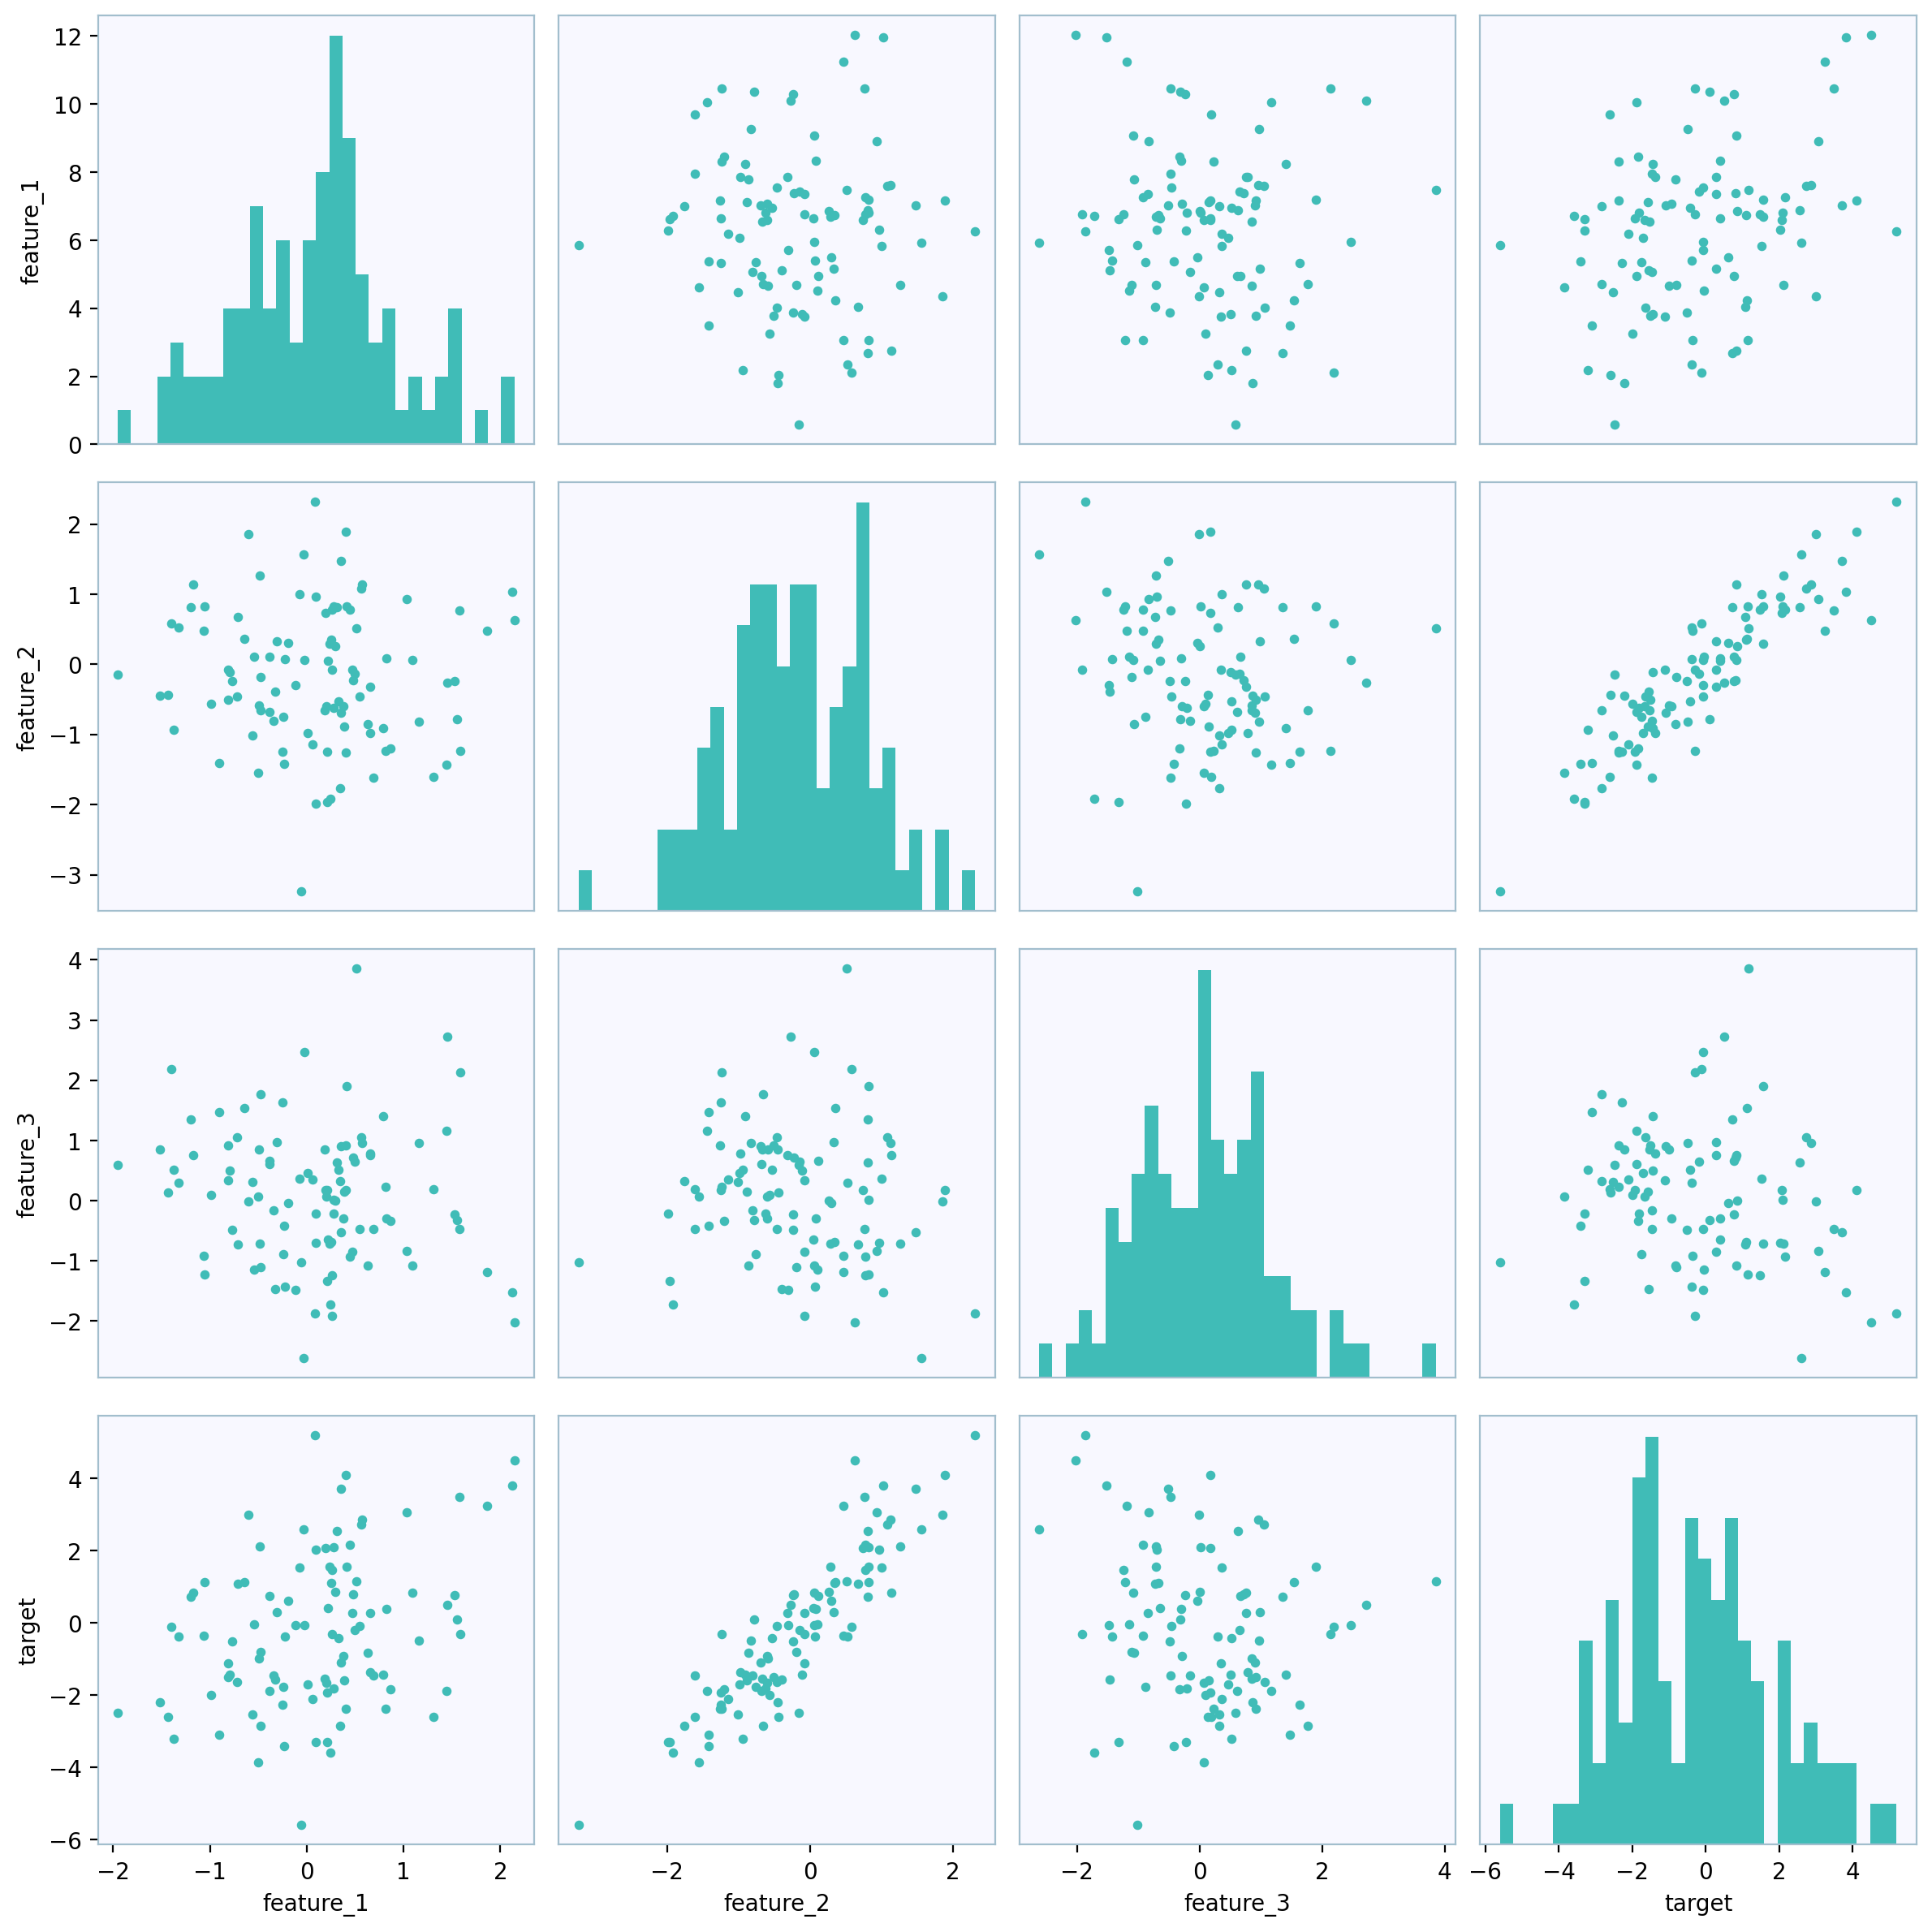

In [7]:
pairs_plot(data)

In [8]:
def linear_regression_workflow(dataframe, target_column):
    
    # Extracting target column
    X, y = extract_y(dataframe, target_column)
    
    # Running linear regression
    X_sm = sm.add_constant(X)
    model = sm.OLS(y, X_sm).fit()
    
    # Print summary
    print(model.summary())
    
    # Plot significance of coefficients
    plot_significance(model)
    
    # Display diagnostic plots
    diagnostic_plots(model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     713.7
Date:                Sat, 12 Aug 2023   Prob (F-statistic):           1.78e-65
Time:                        19:26:52   Log-Likelihood:                -58.644
No. Observations:                 100   AIC:                             125.3
Df Residuals:                      96   BIC:                             135.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0564      0.045      1.241      0.2

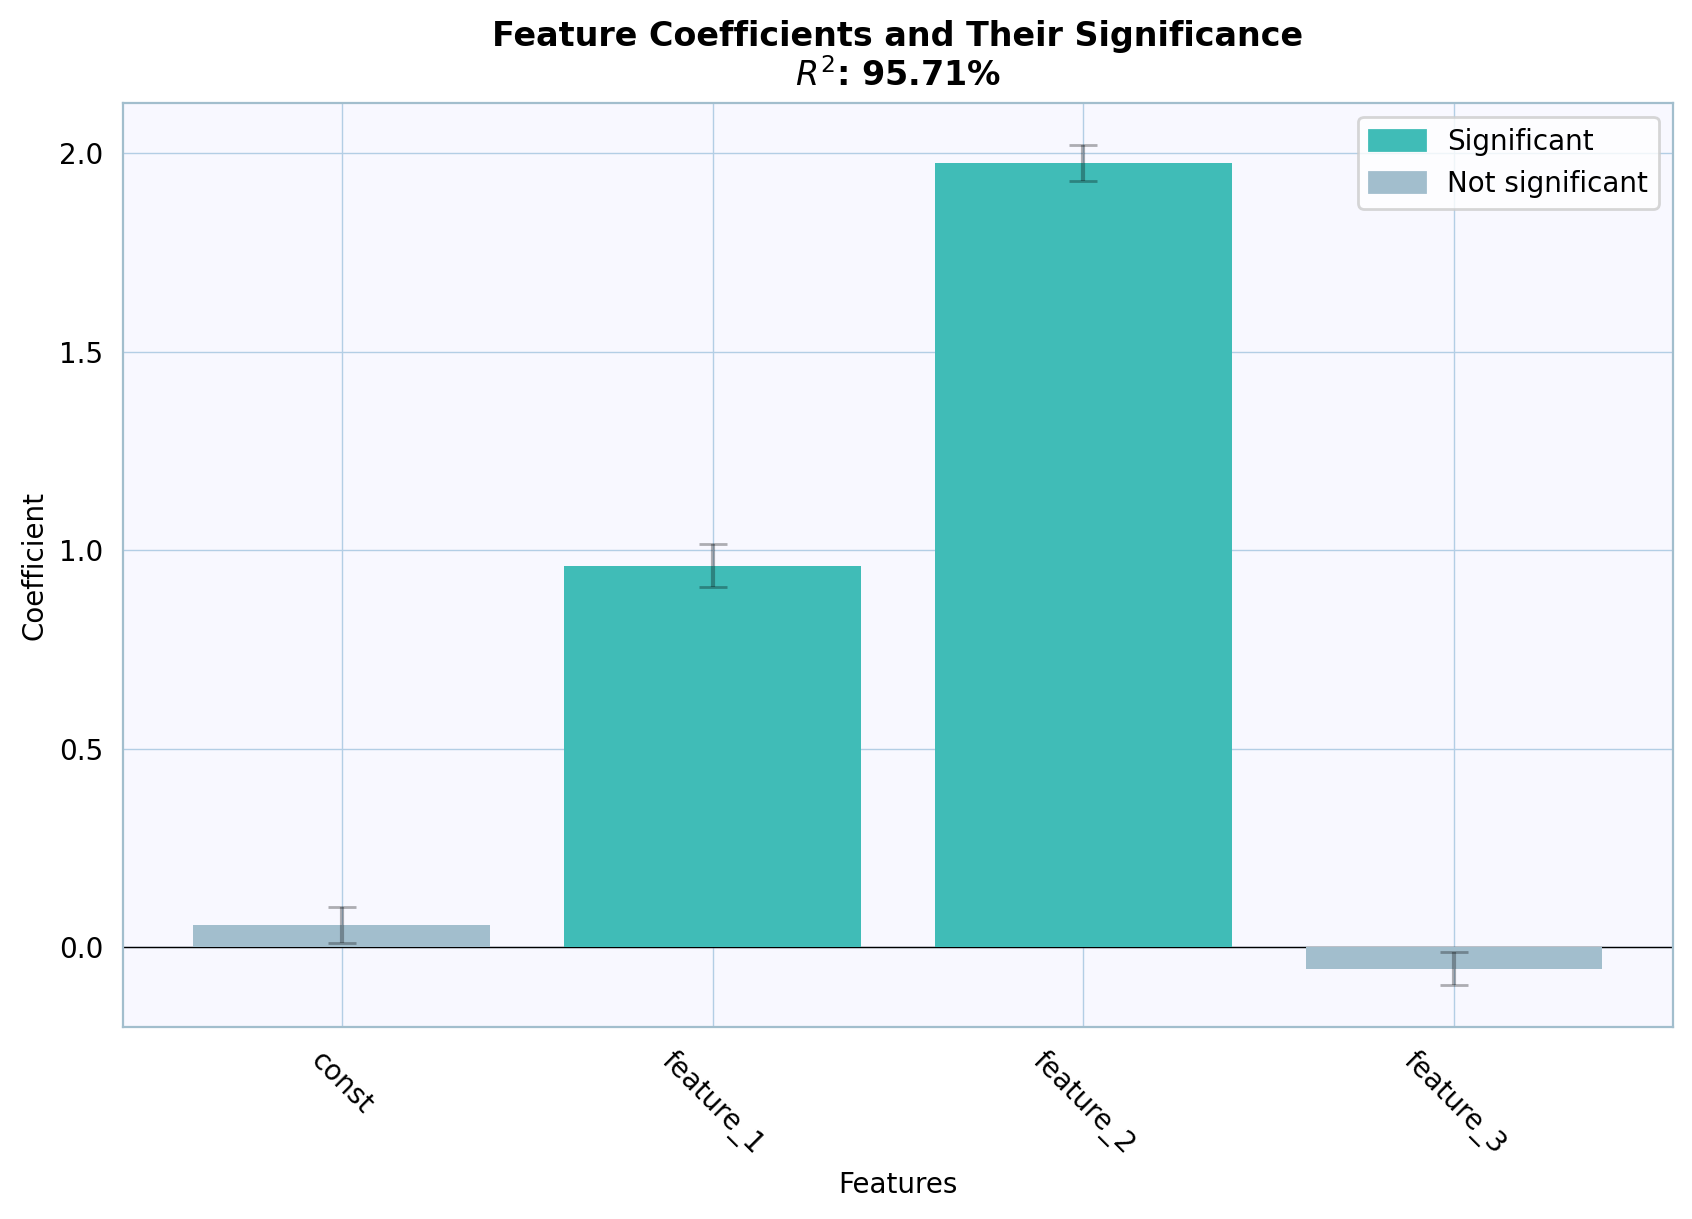

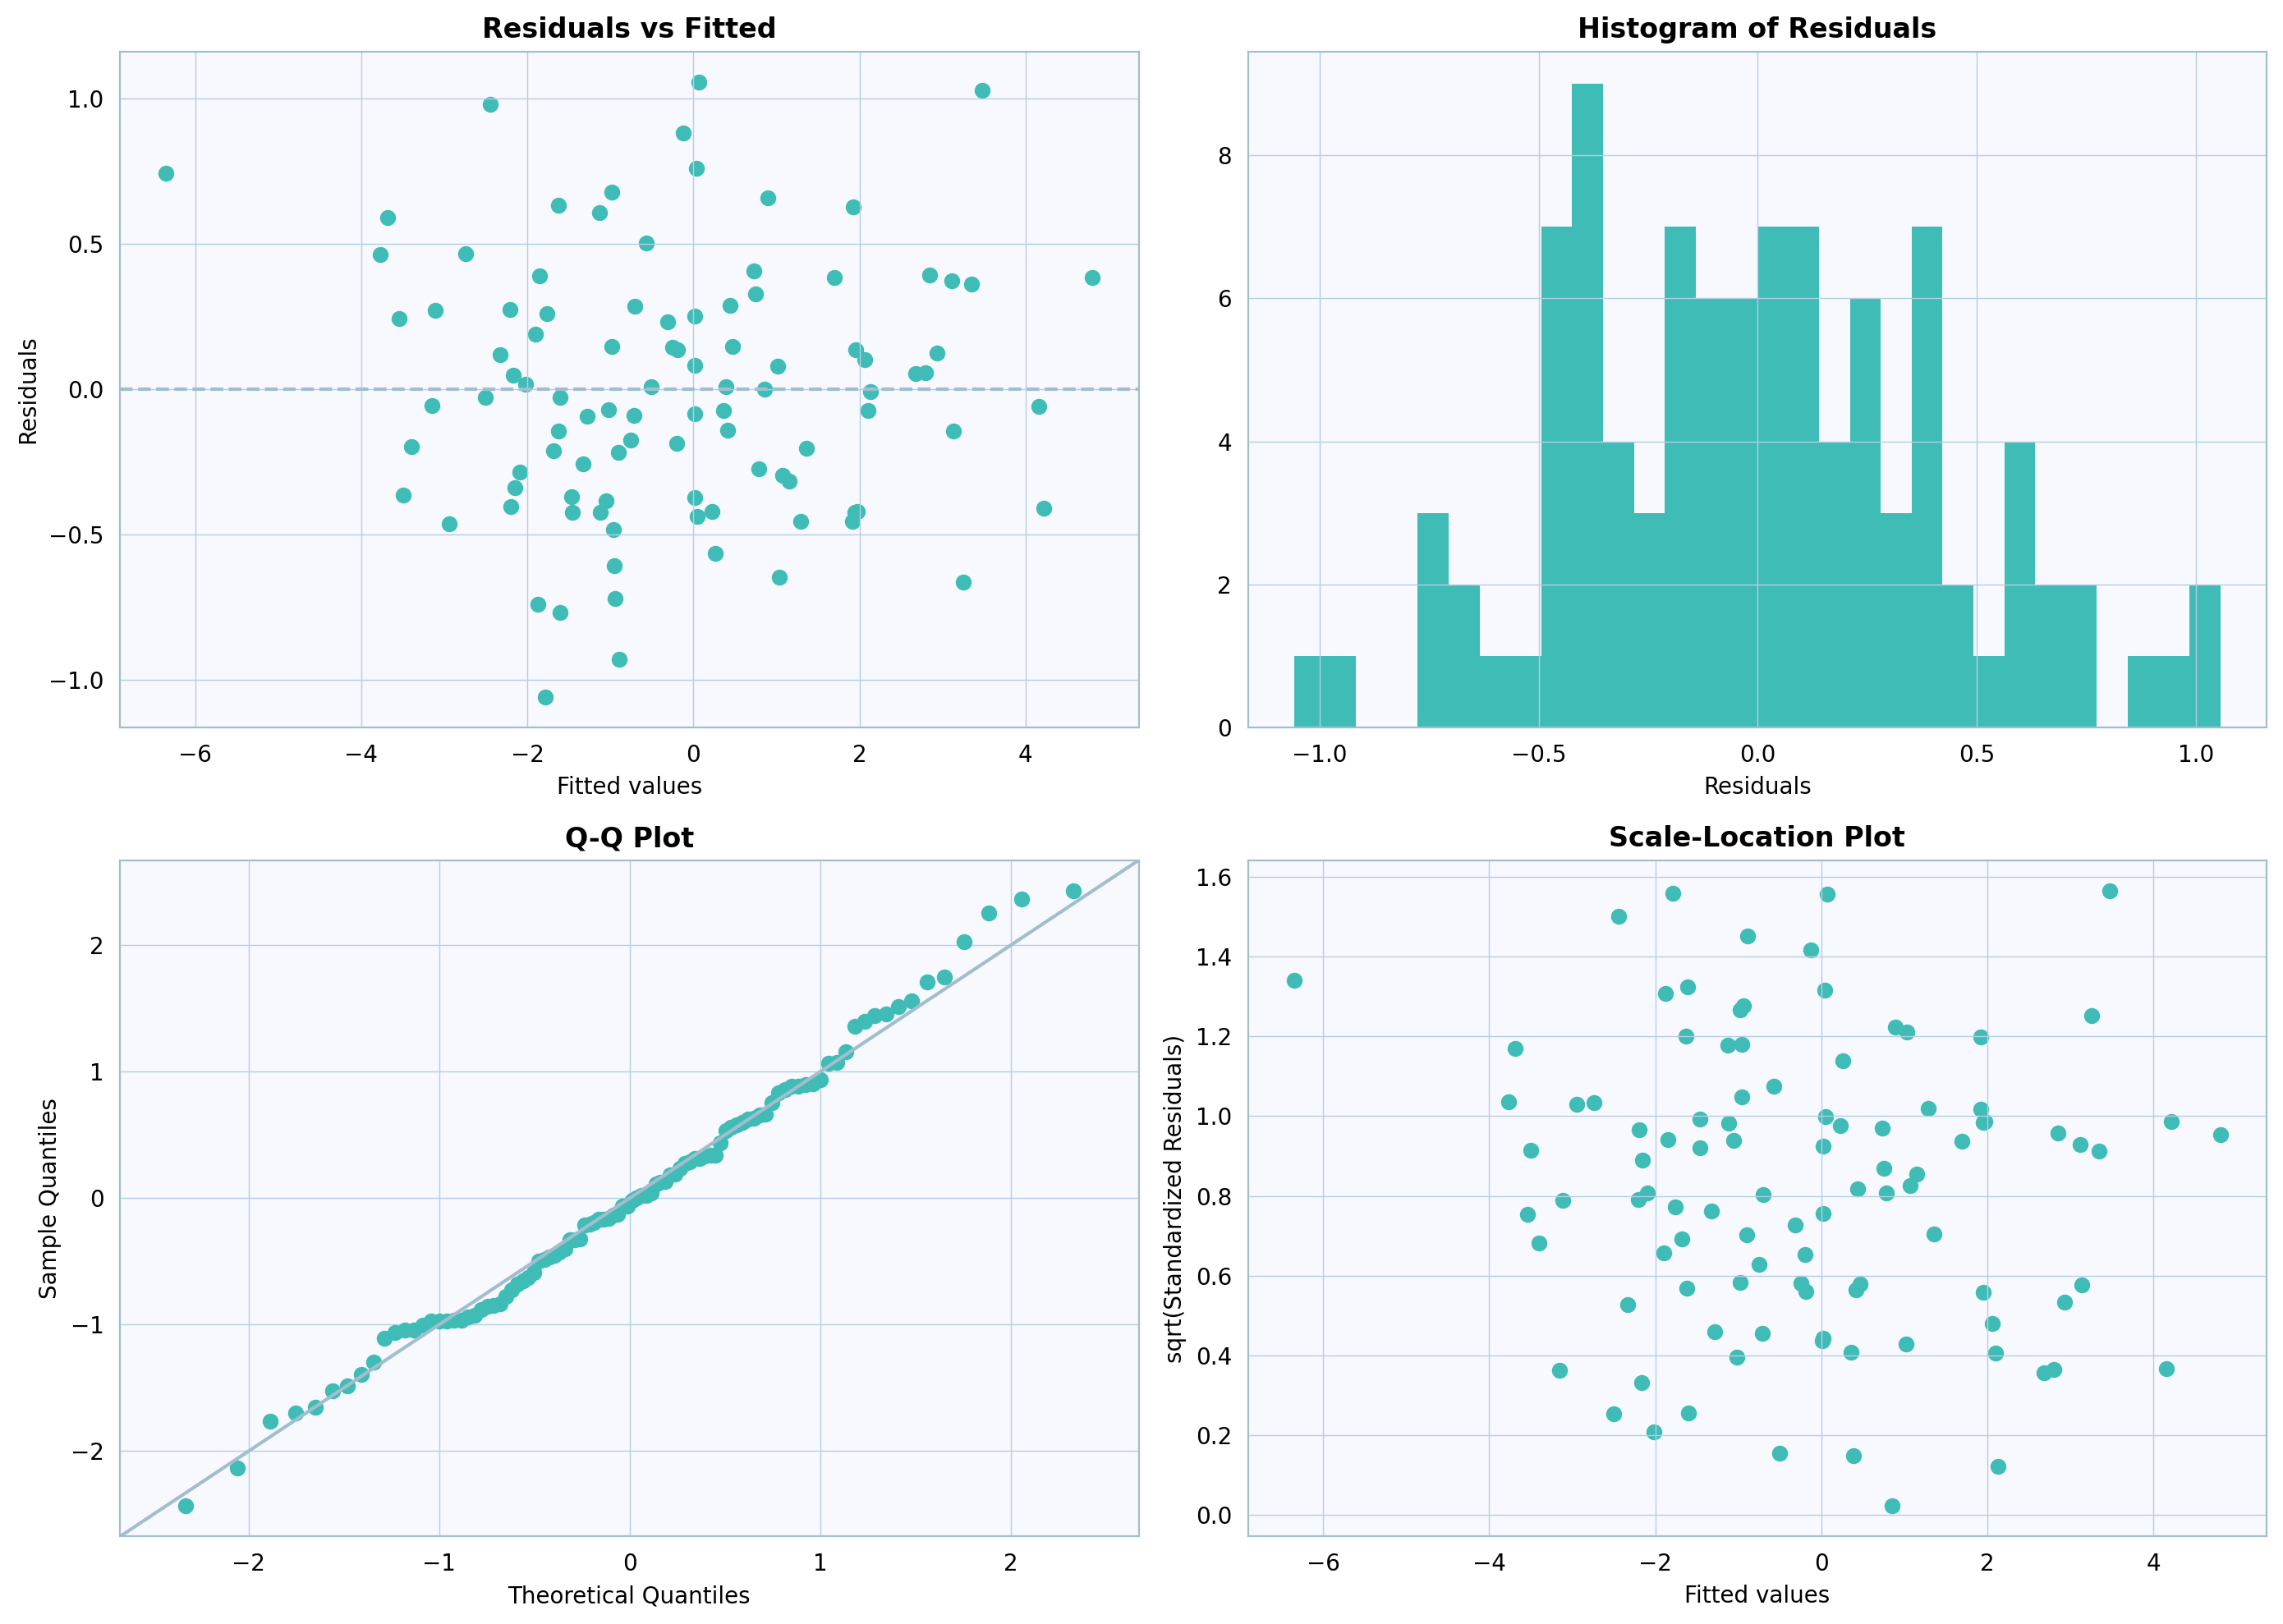

In [9]:
# Assuming the previously defined functions are present
# Call the function:
linear_regression_workflow(data, 'target')